<a href="https://colab.research.google.com/github/boropx999/hello-world/blob/main/Face_detection_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import numpy as np
#doc dia chi hinh anh
import os
#xu ly ve hinh anh
from PIL import Image

In [239]:
#khai bien doc dia chi
train_data ='drive/MyDrive/CNN/training'
test_data='drive/MyDrive/CNN/test'
validation_data='drive/MyDrive/CNN/validation'

In [240]:
listdata_train=[]
listdata_test=[]
listdata_validation=[]
dict={'bao':[0],'ngoc':[1],'nhat':[2]}

In [241]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[4]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [242]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [243]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(90, 1)

In [244]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [245]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(4, 256, 256, 3)

In [246]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [247]:
yname=y_train.flatten()

In [248]:
class_names=['bao','ngoc','nhat']
x_pre=x_test
y_pre=y_test
y_pre

array([[2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1]])

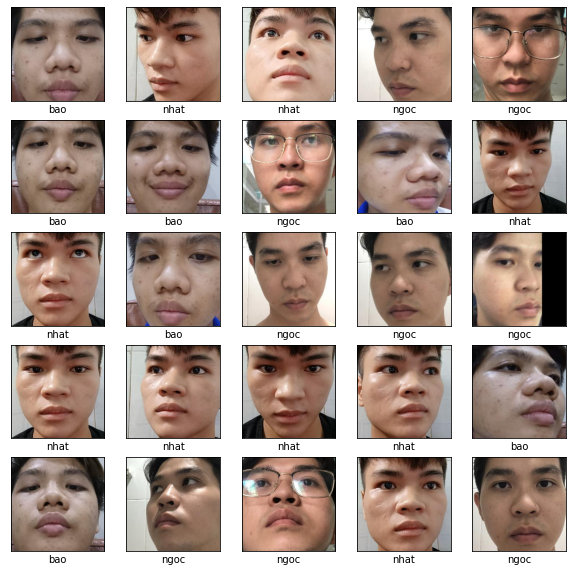

In [249]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [250]:
from keras.utils import np_utils
x_train=x_train.reshape(90,196608)
x_test=x_test.reshape(57,196608)
x_validation=x_validation.reshape(4,196608)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,3)
y_test= np_utils.to_categorical(y_test,3)
y_validation= np_utils.to_categorical(y_validation,3)

In [251]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(196608,)))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 1000)              196609000 
                                                                 
 dense_58 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_26 (Dropout)        (None, 1000)              0         
                                                                 
 dense_59 (Dense)            (None, 512)               512512    
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_60 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 198,124,051
Trainable params: 198,124,0

In [252]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [253]:
history=model.fit(x_train,y_train,batch_size=90,epochs=1000,verbose=1,validation_data=(x_validation,y_validation)) #epochs số lần học

Epoch 1/1000
1/1 [==============================] - 1s 638ms/step - loss: 1.2940 - accuracy: 0.2667 - val_loss: 400.0689 - val_accuracy: 0.2500
Epoch 2/1000
1/1 [==============================] - 0s 126ms/step - loss: 371.0140 - accuracy: 0.3333 - val_loss: 56.1561 - val_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 121ms/step - loss: 90.5725 - accuracy: 0.4333 - val_loss: 67.0261 - val_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 110ms/step - loss: 116.2532 - accuracy: 0.3222 - val_loss: 127.1795 - val_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 111ms/step - loss: 89.4017 - accuracy: 0.4111 - val_loss: 208.1777 - val_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 109ms/step - loss: 171.6158 - accuracy: 0.3333 - val_loss: 98.1903 - val_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 108ms/step - loss: 78.9401 - accuracy: 0.3444 - val_loss: 51.8013 - val_accu

In [254]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 7.558906078338623
Test accuary 0.7543859481811523


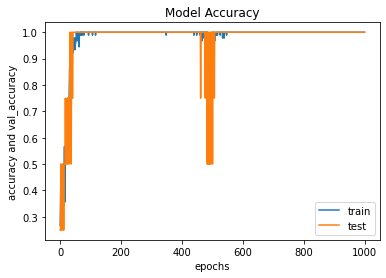

In [255]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy and val_accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()

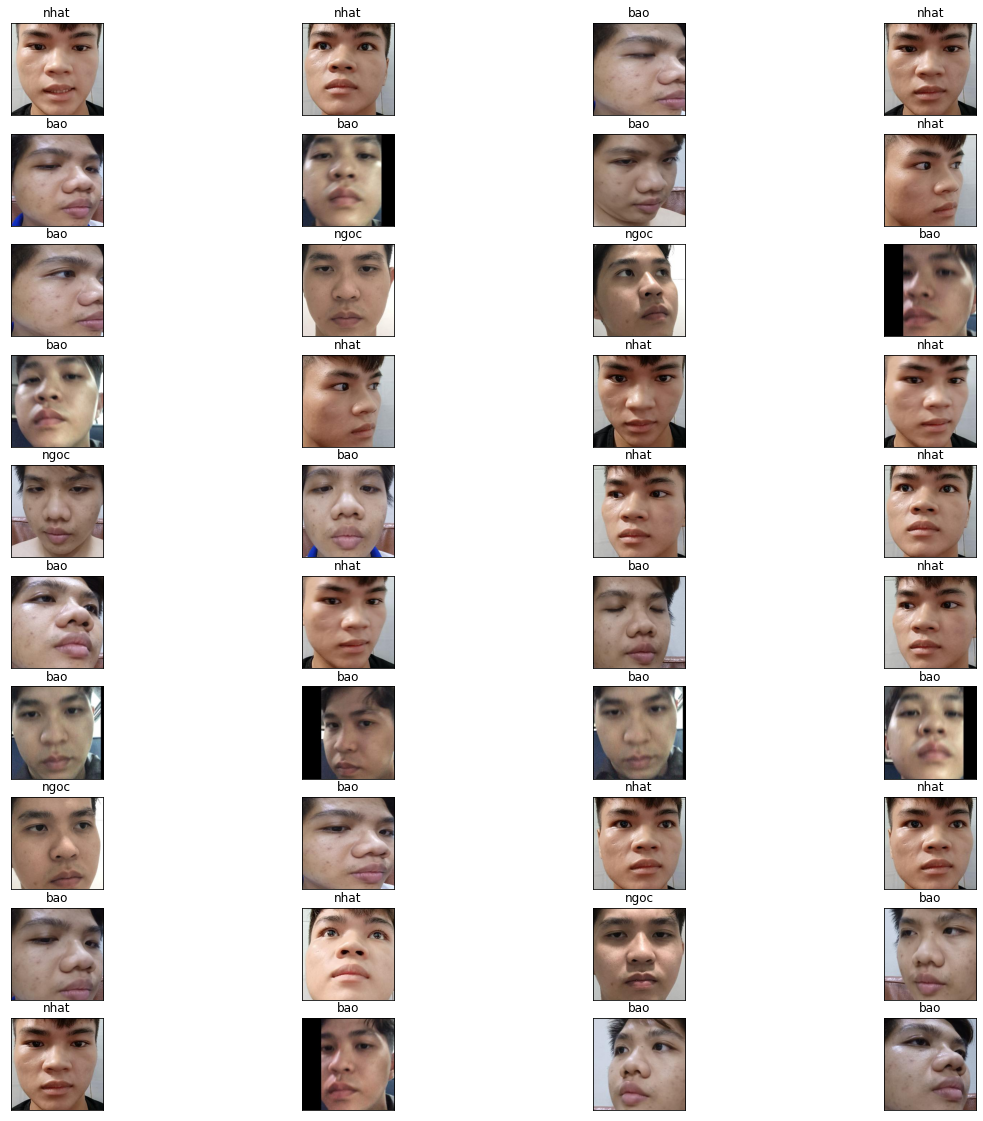

In [257]:
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title(str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,196608))))]))
plt.show()